<div align="center">

## **Section 1: Title**

</div>

<div align="center">

## **Section 2: Introduction**

</div>

Understanding player engagement is important for planning and managing a game research project. In this study, we investigate which types of players are more likely to subscribe to a game-related newsletter. Subscribing to a newsletter may show a player’s deeper interest in the game and their willingness to stay involved in future updates or events. Knowing which player characteristics and behaviors are linked to subscriptions can help the research team target recruitment efforts and allocate resources more effectively.

Our research question is: **`What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?`**

To answer this question, we analyze a dataset called `players.csv`, which was collected by a research group in the Computer Science department at the University of British Columbia. The dataset contains information about each player, such as their age, gender, experience level, total hours played, and whether or not they subscribed to the newsletter. By exploring these features, we aim to identify what makes a player more likely to subscribe and how subscriber and non-subscriber groups differ. This information can help support better decision-making in the game research project

players.csv, a list of all unique players, includes 196 observations and 7 different variables: 
| Variables  |       type      |   meaning
| ---------- | --------------- | ----------------------------------------------------------------------------- |
|Experience  |character vector | distinguish players'experience into 5 levels                                  |
|subscribe   |logical          | true if the player has subscribed to a game-related newsletter, false if the player did not  subscribe |
|hashedEmail |character        | email address                                                                 |
|played_hours|double           | hours players spent on playing game                                           |       
|name        |character        | name of each player                                                           |
|gender      |character        | gender of each player                                                         |
|Age         |double           | age of each player    

In [ ]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
install.packages("patchwork")
library(patchwork)
options(repr.matrix.max.rows = 6) # Makes datasets show up to only 6 observations

1.loads data 
2.wrangles and cleans the data to the format necessary for the planned analysis
3.performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
4.creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
5.performs the data analysis
6.creates a visualization of the analysis 

### **1)Load Data**

In [ ]:
#Read the two datasets
player_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/sessions.csv"
players <- read_csv(player_url)
sessions <- read_csv(sessions_url)

### **2)wrangles and cleans the data**

In [ ]:
#Check for Duplicate Records for player data
nrow(players) - nrow(distinct(players))

#Check if there is NA value in Variables for session data
colSums(is.na(players))

#Remove NA value
players <- players|>
  filter(!is.na(Age))

#Check again
colSums(is.na(players))

#Check for Duplicate Records for session data
nrow(sessions) - nrow(distinct(sessions))

players <- players |>
    mutate(gender = as_factor(gender),
          subscribe = as_factor(subscribe),
          experience = as_factor(experience ))

library(dplyr)
glimpse(players)
players |> count(experience)

### **3)Summary of players dataset**

### **PLAYERS DATA (`players.csv`)**

| Player.csv       | Value |
|-----------------|-------|
| Number of Observations | 196 |
| Number of Variables    | 7   |


| **Variable Name**  | **Data Type**  | **Description**  | **Mean (if applicable)**  | **Standard Deviation** | **Min** | **Max** |
|-------------------|--------------|-----------------|----------------------|--------------------|------|------|
| **experience**    | Character    | 4 types of Player’s experience level: Beginner, Regular, Veteran, Pro | / | / | / | / |
| **subscribe**     | Logical (TRUE/FALSE) | Whether the player subscribed to the game newsletter | / | / | / | / |
| **hashedEmail**   | Character    | Anonymized player email | / | / | / | / |
| **played_hours(hr)**  | Numeric (dbl) | Total hours the player has spent in the game | 5.85 | 28.50 | 0 | 223 |
| **name**         | Character    | Player’s in-game name | / | / | / | / |
| **gender**       | Character    | Player’s gender (Male/Female) | / | / | / | / |
| **Age(year)**          | Integer      | Age of Player | 20.52 | 6.17 | 8 | 50 |

In [98]:
library(dplyr)
glimpse(players)

Rows: 194
Columns: 9
$ experience     <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regul…
$ subscribe      <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE,…
$ hashedEmail    <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728…
$ played_hours   <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6,…
$ name           <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adri…
$ gender         <fct> Male, Male, Male, Female, Male, Female, Female, Male, M…
$ Age            <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, …
$ gender_grouped <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fe…
$ played_any     <fct> TRUE, TRUE, FALSE, TRUE, TRUE, FALSE, FALSE, FALSE, TRU…


### Visualizations

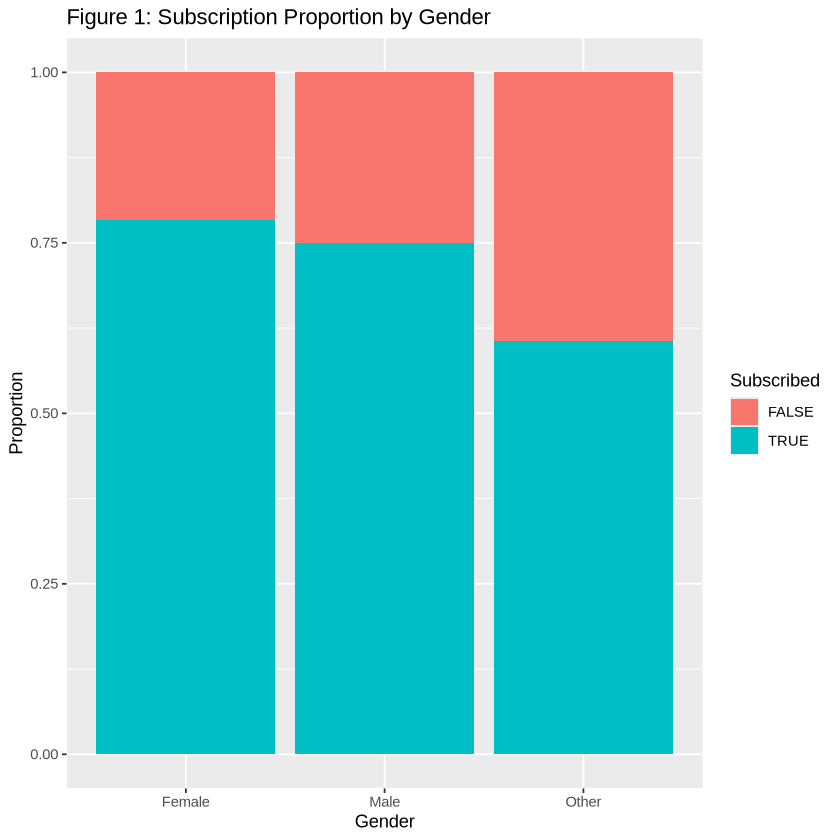

In [99]:
# subscription rate vs Gender
players <- players |> 
  mutate(gender_grouped = case_when(
    str_to_lower(gender) %in% c("male", "m") ~ "Male",
    str_to_lower(gender) %in% c("female", "f") ~ "Female",
    !is.na(gender) ~ "Other",
    TRUE ~ NA_character_))

gender_chart<-ggplot(players, aes(x = gender_grouped, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Figure 1: Subscription Proportion by Gender",
    x = "Gender",
    y = "Proportion",
    fill = "Subscribed")

gender_chart


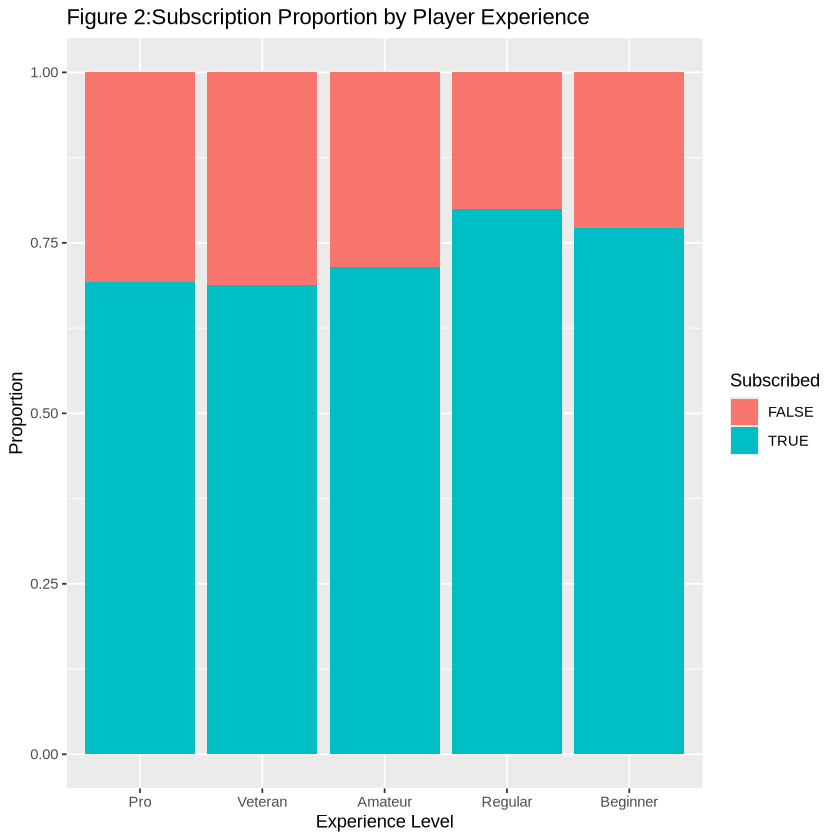

In [100]:
# subscription rate vs Experience level
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Figure 2:Subscription Proportion by Player Experience",
    x = "Experience Level",
    y = "Proportion",
    fill = "Subscribed")



Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


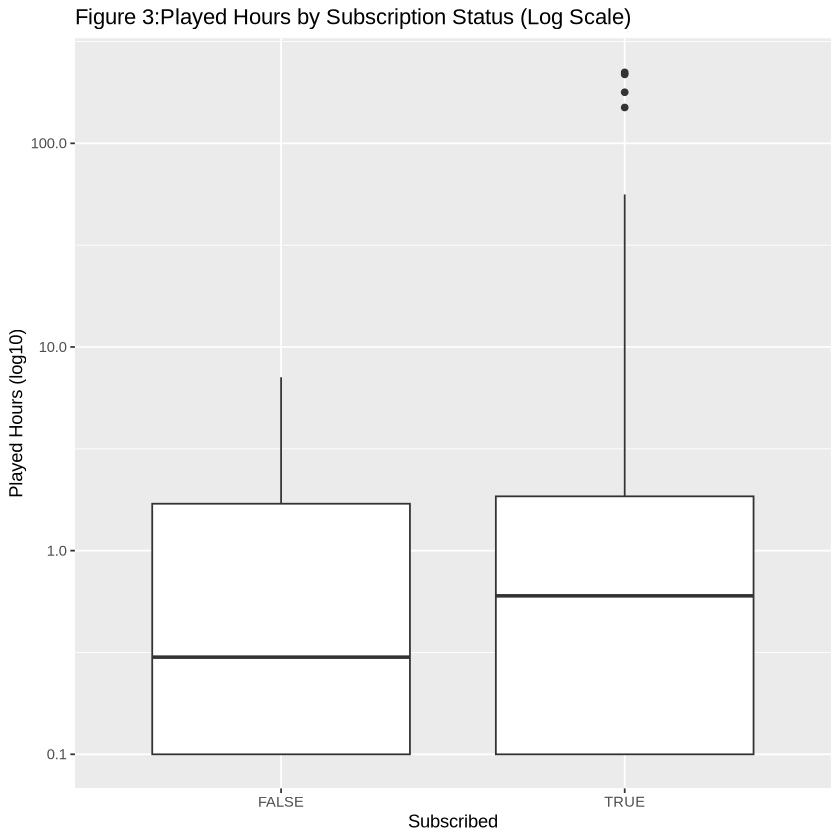

In [101]:
Box_plot_played_hours <- ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(y = "Played Hours (log10)", 
       x = "Subscribed",
       title = "Figure 3:Played Hours by Subscription Status (Log Scale)")

Box_plot_played_hours 


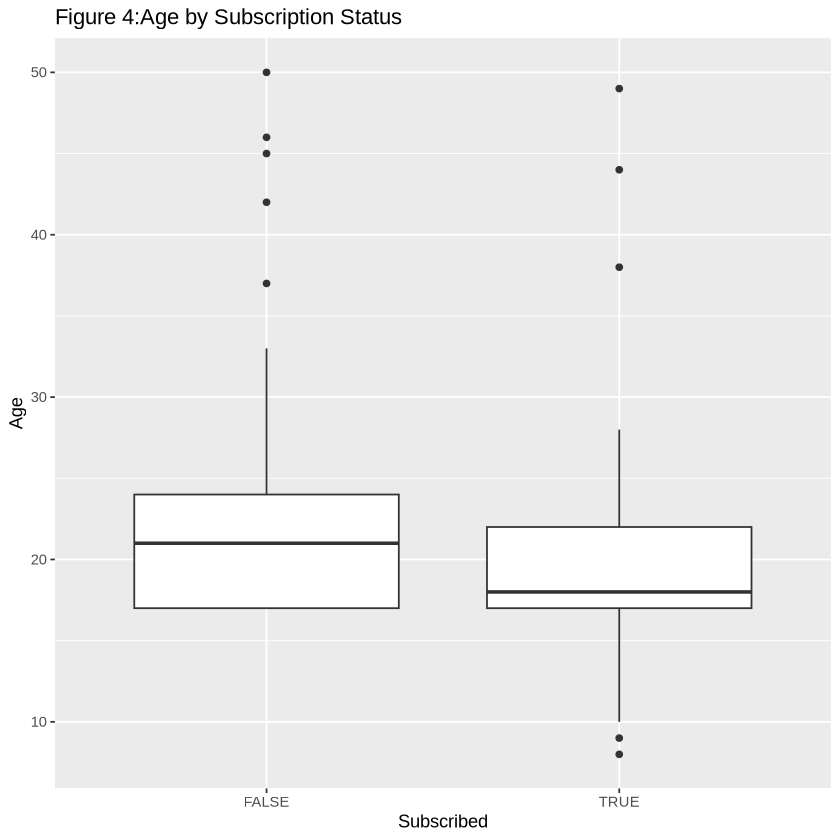

In [102]:
Box_plot_age <- ggplot(players, aes(x = subscribe, y = Age)) +
  geom_boxplot() +
  labs(y = "Age", 
       x = "Subscribed",
       title = "Figure 4:Age by Subscription Status")

Box_plot_age

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


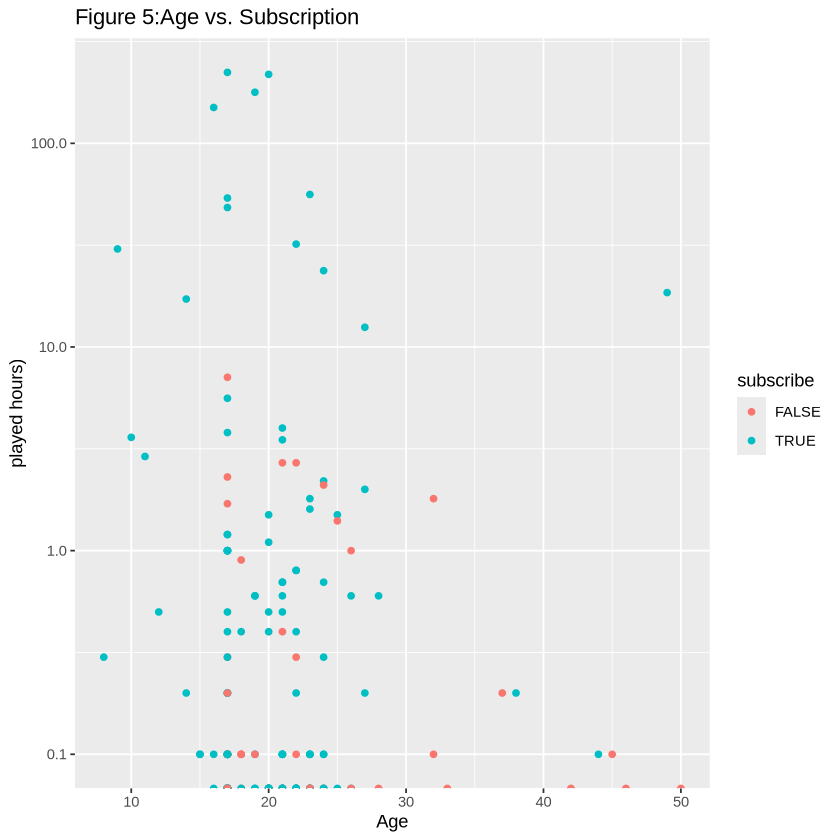

In [103]:
#age vs played_hours
distribution<-ggplot(players,
       aes(x = Age, y = played_hours,color=subscribe	)) +
  geom_point() +
  scale_y_log10()+#log
 labs(
    title = "Figure:Age vs. Subscription",
    x = "Age",
    y = "played hours)")
distribution


n
<int>
58


played_any,subscribe,n
<lgl>,<fct>,<int>
FALSE,FALSE,27
FALSE,TRUE,58
TRUE,FALSE,25
TRUE,TRUE,84


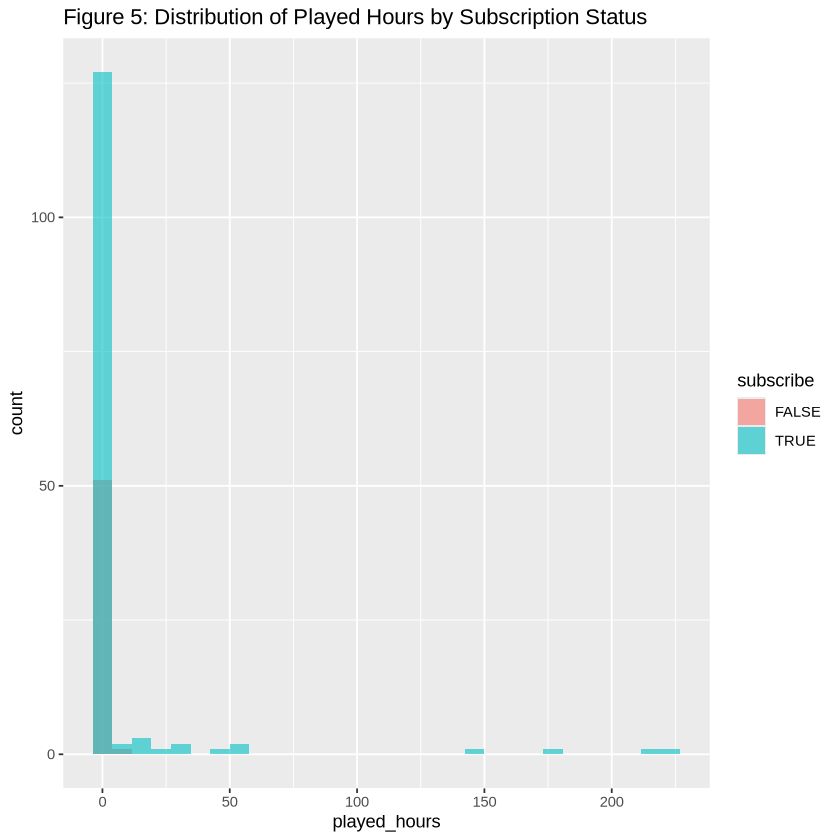

In [104]:
players |> 
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(bins = 30, position = "identity", alpha = 0.6) +
  labs(title = "Figure 5: Distribution of Played Hours by Subscription Status")

players |> 
  filter(played_hours == 0, subscribe == TRUE) |> 
  count()

players |> 
  mutate(played_any = played_hours > 0) |>
  count(played_any, subscribe)

In [59]:
players |> count(subscribe)

subscribe,n
<fct>,<int>
FALSE,52
TRUE,142


<div align="center">

## **Section 3: Methods & Results**

</div>

### Data Analysis

In [90]:
set.seed(1)
library(themis)

# Splitting the data into a training set and a testing set
players_split <- initial_split(players, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

# Making a recipe and specification
players_recipe <- recipe(subscribe ~ Age + played_hours+experience+gender, data = players_train) |>
   step_scale(Age,played_hours) |>
   step_center(Age,played_hours)|>
   step_dummy(all_nominal_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
players_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6152709,5,0.04043012,Preprocessor1_Model01
1,roc_auc,binary,0.5362554,5,0.05306597,Preprocessor1_Model01
2,accuracy,binary,0.5800493,5,0.02610140,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,roc_auc,binary,0.6206130,5,0.045765369,Preprocessor1_Model29
30,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model30
30,roc_auc,binary,0.6125116,5,0.045164522,Preprocessor1_Model30


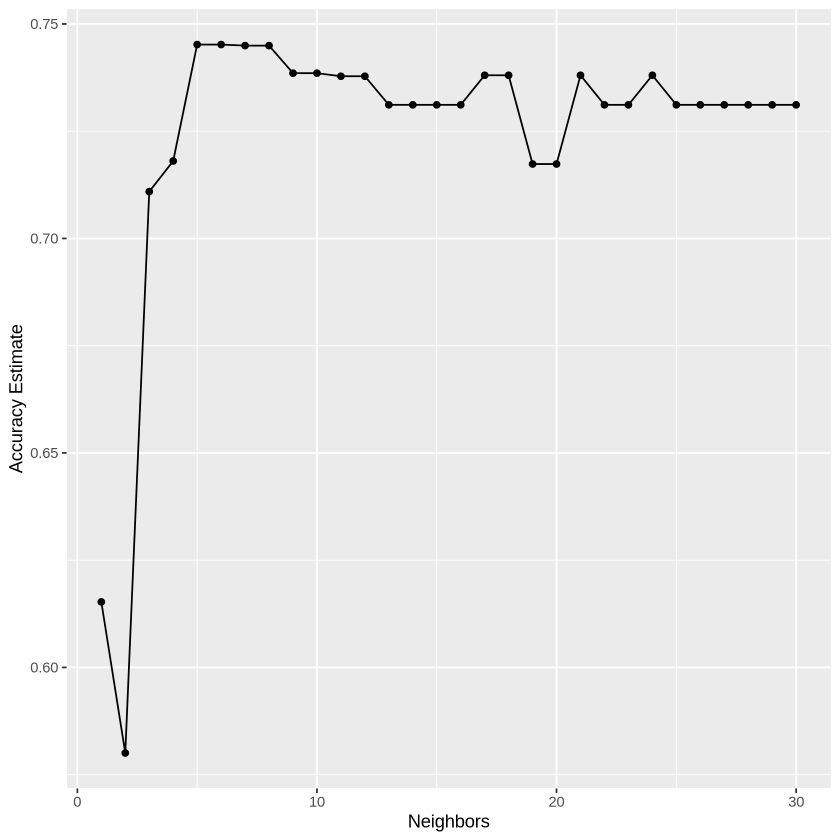

In [91]:
set.seed(1)

# Performing cross-validation on the training data with 5  folds
vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

# Choosing the k values for which we want to see the accuracy
# We chose 1 to 15 because we thought that this could be a big enough variety to observe the best k, if one exists
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Extracting the metrics from the workflow
players_metrics <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = vfold, grid = k_vals) |>
    collect_metrics()
players_metrics

# Getting the accuracies
accuracy <- players_metrics |>
    filter(.metric == "accuracy")

# Plotting the k values for each number of neighbors from 1 to 15
cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate")

cross_val_plot

In [94]:
set.seed(1)

# Making sure that the maximum that we see on the graph above is the same as the actual maximum
best_k <- accuracy |>
    slice_max(mean) |>
    select(neighbors) |>
    pull()
best_k

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = min(best_k)) |>
    set_engine("kknn") |>
    set_mode("classification")

[1] 5 6

In [105]:
#build the model
players_spec <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = 5)|>
    set_engine("kknn")|>
    set_mode("classification")

players_fit<- workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec)|>
    fit(data=players_train)

#test by using final model
player_predictions<- predict(players_fit,players_test)|>
    bind_cols(players_test)

players_metrics <- player_predictions|>
    metrics(truth=subscribe, estimate=.pred_class)

players_conf_mat <- player_predictions|>
    conf_mat(truth=subscribe, estimate=.pred_class)

players_metrics 
players_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7551020
kap,binary,0.1671388


          Truth
Prediction FALSE TRUE
     FALSE     2    1
     TRUE     11   35

<div align="center">

## **Section 4: Discussion:**

</div>

Our research question was:
"What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

To answer this, we looked at four main features: gender, experience level, age, and played hours. We created several visualizations to explore how each of these features relates to subscription.

First, we wanted to see how subscription rates change across different gender groups. For simplicity, we grouped players into Male, Female, and Other. From Figure 1, we can see that the subscription rates are not the same for each group. This shows that gender may have some influence on whether a player subscribes or not. Therefore, we used it in our knn model.

Second, we wanted to know if experience level affects subscription. From Figure 2, we can see that subscription rates are slightly different across experience groups. For example, beginners and regular players seem to subscribe more often than pros or veterans. This suggests that less experienced players may be more likely to subscribe, possibly because they are newer to the game and more curious or excited to try it out.

Third, we wanted to see how the amount of time players spend playing affects subscription. In Figure 3, we noticed that many players who subscribed had very low played hours, while players with higher played hours did not always subscribe at higher rates. This indicates that subscription is not simply driven by the number of hours played. In fact, a lot of players subscribe even if they barely play the game, which may be due to other reasons such as promotions or curiosity.

Fourth, we examined whether age plays a role in subscription behavior. In Figure 4, the data shows a trend where subscription rates differ across age groups. For example, younger players may subscribe more often than older ones, or vice versa. This suggests that age could influence subscription decisions, perhaps because different age groups have varying interests or levels of engagement with the game.

These findings can help game companies understand who their subscribers are. If many people subscribe before playing, it might be because of ads, social media, or rewards. Companies could focus on new players and early engagement strategies to keep them interested.

In the future, we want to learn more about why people subscribe without playing. Do they get rewards? Are they influenced by friends? Are they just curious? These questions could help us improve models and learn more about player behavior.

#for table
While exploring the data, we discovered that many players subscribed without playing the game. In fact, 58 players subscribed even though their play time was zero. This number is larger than the group who didn’t play and didn’t subscribe (27). This made it harder for our model to find clear patterns, because we expected people to play first and then subscribe. We think these players might have subscribed for reasons outside the game, such as rewards or curiosity.

#explanation for last part(false positive and false negative)
At first, we thought that players who spent more time playing the game would be more likely to subscribe. So we used played_hours as one of the main features in our model. But later, we noticed something interesting — many players who subscribed didn’t play at all. This made the model confused and led to poor results.

We also tried using experience, gender, and age to see if they could help. After testing different combinations, we found that using all four features gave us the best results. The accuracy went up, and the model was finally able to predict both TRUE and FALSE subscriptions.

<div align="center">

## **Section 5: References:**

</div>